In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlresearch.utils import set_matplotlib_style
from algorec.recourse import NFeatureRecourse
from algorec.populations import BasePopulation
from algorec.environments import BankLoanApplication2

In [3]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 0
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 20  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = 10  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 50  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

# TODO: end and stop from updating when population becomes too small

# Generate data and fit regression
continuous = [f"f_{i}" for i in range(N_CONTINUOUS)]
categorical = [f"cat_{i}" for i in range(N_CAT)]
rng = np.random.default_rng(RNG_SEED)
df = pd.DataFrame(
    rng.random((N_AGENTS, N_CONTINUOUS)),
    columns=[f"f_{i}" for i in range(N_CONTINUOUS)],
)

for i in range(N_CAT):
    df[f"cat_{i}"] = rng.integers(0, 2, N_AGENTS)

y = rng.integers(0, 2, N_AGENTS)
lr = LogisticRegression().fit(df, y)

In [4]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication2(
    population,
    recourse,
    n_loans=N_LOANS,
    adaptation=ADAPTATION,
    new_agents=NEW_AGENTS,
    random_state=RNG_SEED,
)

environment.run_simulation(20)

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Population scores over 21 time steps'}, xlabel='Step', ylabel='Score'>)

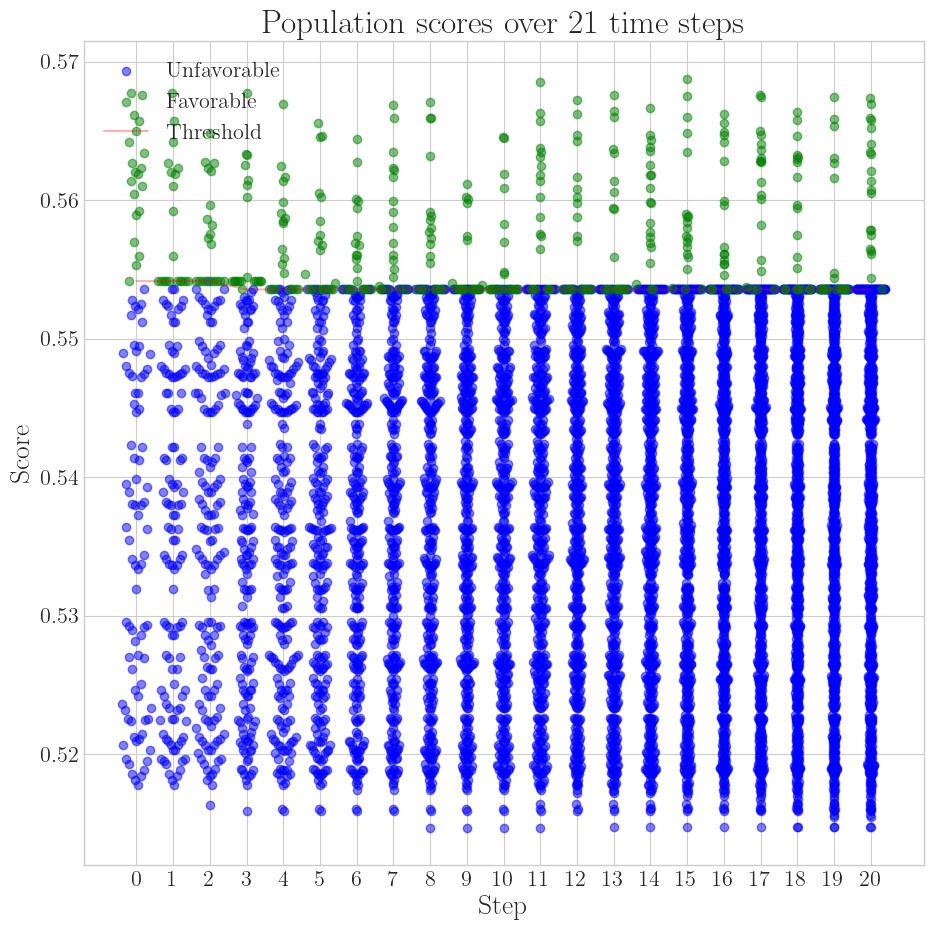

In [5]:
environment.plot.agent_scores()

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Population at t=5'}, xlabel='f_0', ylabel='f_1'>)

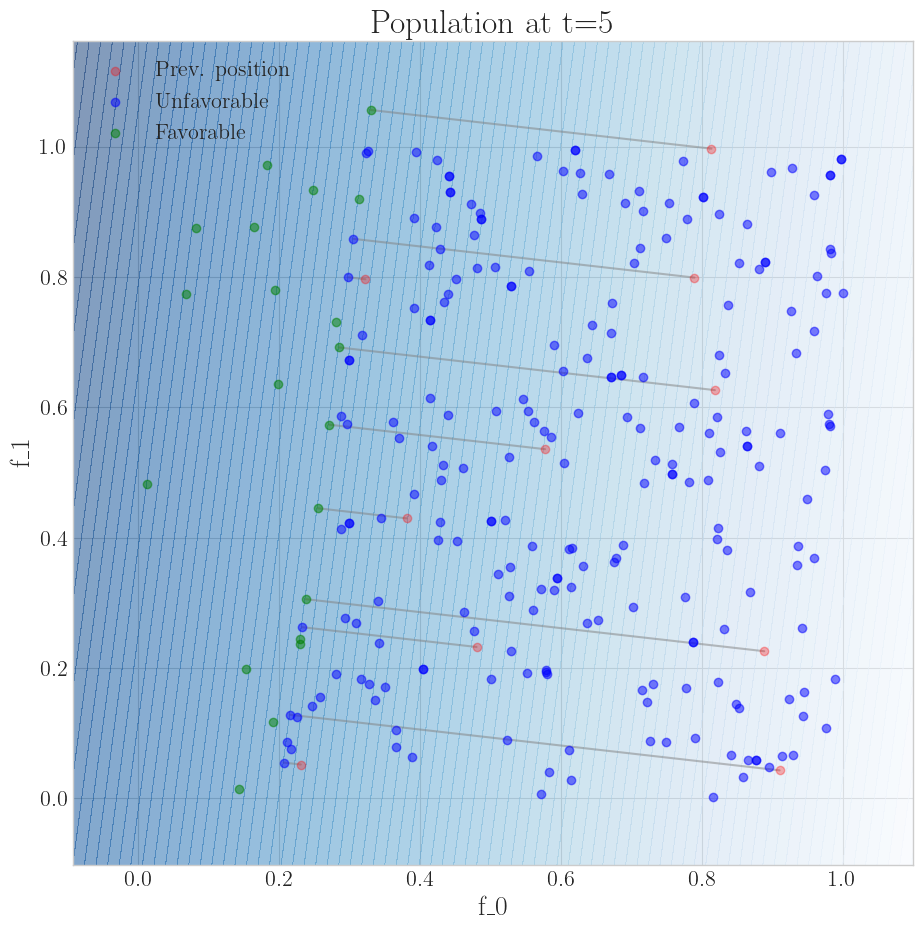

In [6]:
environment.plot.scatter(5)

(array([18., 10.,  8.,  9., 12.,  9., 12.,  6.,  9.,  7.]),
 array([0.51773837, 0.52273851, 0.52773864, 0.53273878, 0.53773892,
        0.54273906, 0.54773919, 0.55273933, 0.55773947, 0.5627396 ,
        0.56773974]),
 <BarContainer object of 10 artists>)

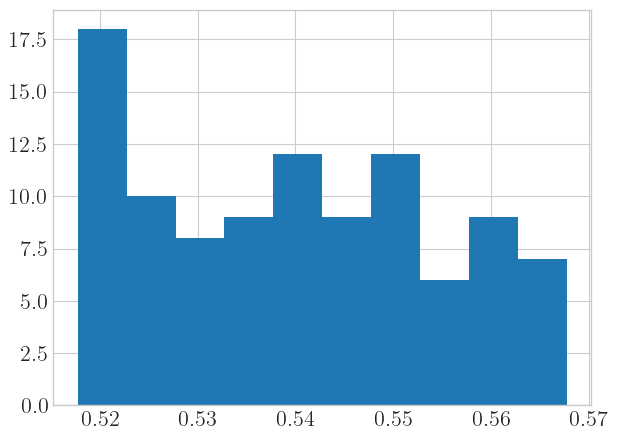

In [7]:
environment.plot.scores_histogram(0)

<Axes: ylabel='Density'>

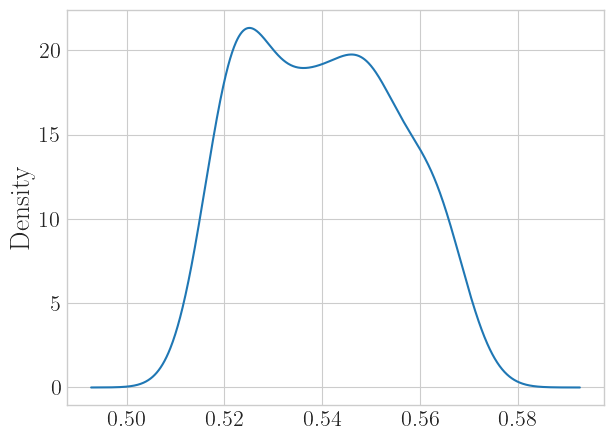

In [8]:
environment.plot.scores_kde(0)
# environment.plot.scores_kde(100)

<Axes: title={'center': 'Population size over 21 time steps'}, xlabel='Step', ylabel='Number of agents'>

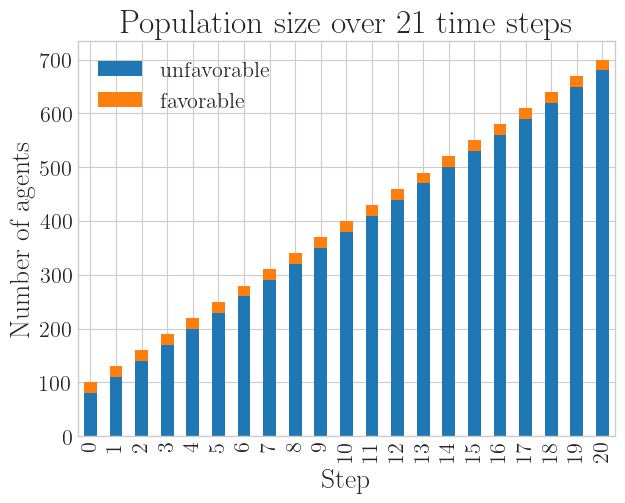

In [9]:
environment.plot.population_size()

In [10]:
environment.success_rate(1, 20)

array([1. , 0.9, 1. , 0.6, 0.5, 0.4, 0.2, 0.4, 0.4, 0.7, 0.3, 0.6, 0.5,
       0. , 0.1, 0. , 0.2, 0.2, 0.2])

In [11]:
environment.threshold_drift(1, 20)

array([ 0.        ,  0.        , -0.00109229,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [12]:
environment.agents_info()

,entered_step,n_adaptations,favorable_step,original_score,final_score,n_failures
0,0,0,NaN,0.533734,NaN,0
1,0,0,0.0,0.561405,0.561405,0
2,0,1,1.0,0.528940,0.554155,0
3,0,1,2.0,0.538003,0.554155,0
4,0,1,1.0,0.542338,0.554155,0
...,...,...,...,...,...,...
1095,20,0,20.0,0.566931,0.566931,0
1096,20,0,NaN,0.546180,NaN,0
1097,20,0,20.0,0.560725,0.560725,0
1098,20,0,NaN,0.529280,NaN,0


In [13]:
environment.metadata_[0]["threshold"]

0.5541547323609113

In [14]:
# probability of an agent to be above the threshold
p = environment.new_agent_proba(environment.metadata_[0]["threshold"])

# number of observations to generate to have 10 observations above threshold
n = 10 / p
n

50.0

In [16]:
environment.steps_info()

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba
1,10.0,10.0,20.0,1.0,0.554155,0.000000,50.0,0.20
2,10.0,10.0,20.0,0.9,0.554155,0.000000,50.0,0.20
3,10.0,10.0,20.0,1.0,0.553549,-0.001092,50.0,0.21
4,10.0,10.0,20.0,0.6,0.553549,0.000000,50.0,0.21
5,10.0,10.0,20.0,0.5,0.553549,0.000000,50.0,0.21
6,10.0,10.0,20.0,0.4,0.553549,0.000000,50.0,0.21
7,10.0,10.0,20.0,0.2,0.553549,0.000000,50.0,0.21
8,10.0,10.0,20.0,0.4,0.553549,0.000000,50.0,0.21
9,10.0,10.0,20.0,0.4,0.553549,0.000000,50.0,0.21
10,10.0,10.0,20.0,0.7,0.553549,0.000000,50.0,0.21


<Axes: >

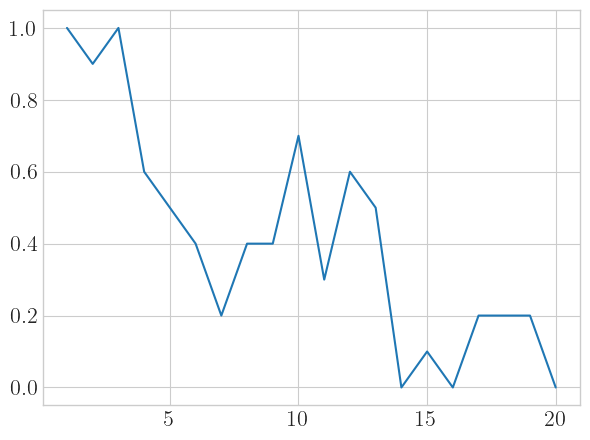

In [17]:
environment.steps_info().success_rate.plot.line()